## Questions:

1) Taylor expansion for u(i-1), why odd derivatives negative?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 41
dx = 2./(nx-1)
nt = 20
nu = 0.3 # viscosity
sigma = 0.2
dt = sigma*dx**2/nu

x = np.linspace(0,2,nx)
ubound = np.where(x >= 0.5)
lbound = np.where(x <= 1)

u = np.ones(nx)
u[np.intersect1d(lbound, ubound)] = 2

un = np.ones(nx)

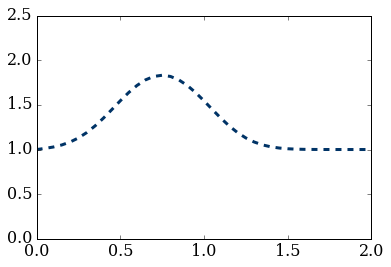

In [5]:
for n in range(nt):
    un = u.copy()
    u[1:-1] = un[1:-1] + nu*dt/dx**2*(un[2:] - 2*un[1:-1] + un[0:-2])

plt.plot(x, u, color='#003366', ls='--', lw=3)
plt.ylim(0,2.5);

In [7]:
from matplotlib import animation
from IPython.display import HTML

In [10]:
# initial conditions
nt = 50

u = np.ones(nx)
u[np.intersect1d(ubound, lbound)] = 2

un = np.ones(nx)

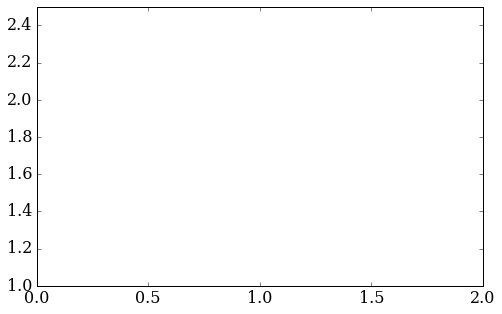

In [11]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(xlim=(0,2), ylim=(1,2.5))
line = ax.plot([],[], color='#003366', ls='--', lw=3)[0]

In [15]:
def diffusion(i):
    line.set_data(x,u)
    
    un = u.copy()
    u[1:-1] = un[1:-1] + nu*dt/dx**2*(un[2:] - 2*un[1:-1] + un[0:-2])

In [16]:
anim = animation.FuncAnimation(fig, diffusion, frames=nt, interval=100)

In [17]:
HTML(anim.to_html5_video())

RuntimeError: No MovieWriters available!